In [8]:
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv(f"../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df_fc_scores = pd.read_csv(f"../data/identifiers_and_abstracts/repo_DOIs_vetle_fc_scores.csv")

In [17]:
df

,Unnamed: 0,year,month,title,link_flair_text,domain,score,num_comments,sensationalism_score,jargon_proportion,...,is_top_domain_less_than_2,is_top_domain_news,is_top_domain_repo,is_top_domain_scam,is_top_domain_scientific,is_top_domain_social_media,is_top_domain_unknown,label_voting_lm,label_voting_manual,top_category
0,0,2018,3,The Bradford pear has created an ecological ni...,Biology,greenvilleonline.com,2,4,0.533427,0.181818,...,False,False,False,False,False,False,False,less_than_2,less_than_2,Life Sciences
1,1,2018,3,Astronomers say they've discovered evidence of...,Astronomy,aftau.org,46,11,0.511129,0.068966,...,False,False,False,False,False,False,False,scientific,scientific,Physical Sciences
2,2,2018,3,The first detection of 21 cm signal from hydro...,Astronomy,news.mit.edu,1,0,0.412405,0.083333,...,False,False,False,False,False,False,False,news,news,Physical Sciences
3,3,2018,3,Universe's First Stars Detected? Get the Facts.,Astronomy,news.nationalgeographic.com,1,1,0.561694,0.000000,...,False,False,False,False,False,False,False,news,news,Physical Sciences
4,4,2018,3,Simple telescope picks up hint of the Universe...,Astronomy,arstechnica.com,3,2,0.492255,0.333333,...,False,False,False,False,False,False,False,news,news,Physical Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197782,197782,2019,10,"""Smoker's Face,"" a condition where smokers loo...",Biology,eurekalert.org,45,1,0.568060,0.080000,...,False,True,False,False,False,False,False,news,news,Life Sciences
197783,197783,2019,10,WANTED: Pictures of your poop for science,Health,seed.com,6,11,0.524337,0.142857,...,False,False,False,False,False,False,False,less_than_2,less_than_2,Life Sciences
197784,197784,2019,10,New flame retardants in electronics and childr...,Environment,pubs.acs.org,1,0,0.541337,0.142857,...,False,False,True,False,False,False,False,repo,repo,Environmental Sciences
197785,197785,2019,10,Memory editing from science fiction to clinica...,Biology,nature.com,10,1,0.447850,0.250000,...,False,False,False,False,True,False,False,scientific,scientific,Life Sciences


In [18]:
df_fc_scores

,id,title,url,identifier,sem_scholar_title,sem_scholar_abstract,fc_score
0,811az5,Firearm Injuries Drop 20 Percent When Gun Owne...,http://www.nejm.org/doi/full/10.1056/NEJMc1712773,DOI:10.1056/NEJMc1712773,Reduction in Firearm Injuries during NRA Annua...,Decline in Firearm Injuries during NRA Convent...,4
1,814dwi,Supplementation with probiotics during late pr...,http://journals.plos.org/plosmedicine/article?...,DOI:10.1371/journal.pmed.1002507,Diet during pregnancy and infancy and risk of ...,Background There is uncertainty about the infl...,5
2,815lr6,Undisclosed Conflicts of Interests among Biome...,https://www.ncbi.nlm.nih.gov/pubmed/29400625,PMID:29400625,Undisclosed conflicts of interest among biomed...,ABSTRACT Background: Textbooks are a formative...,5
3,817tfx,One more species of Tardigrade (famed for thei...,http://journals.plos.org/plosone/article?id=10...,DOI:10.1371/journal.pone.0192210,An integrative description of Macrobiotus shon...,Tardigrade research in Japan dates back over 1...,2
4,8183ly,There's a20% reduction in gun injuries during ...,http://www.nejm.org/doi/full/10.1056/NEJMc1712773,DOI:10.1056/NEJMc1712773,Reduction in Firearm Injuries during NRA Annua...,Decline in Firearm Injuries during NRA Convent...,4
...,...,...,...,...,...,...,...
5753,dpnj23,"Statements about building walls, deportation a...",https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0222837,Declared impact of the US President’s statemen...,"Statements about building walls, deportation a...",5
5754,dpnu7e,Many college students will uncritically accept...,https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0223736,When calculators lie: A demonstration of uncri...,Calculators are often unnecessary to solve rou...,4
5755,dpqhem,New method for making polymers with perfectly ...,https://pubs.acs.org/doi/10.1021/jacs.9b08240,DOI:10.1021/jacs.9b08240,Homogenous Synthesis of Monodisperse High Olig...,Whereas monodisperse polymers are ubiquitous i...,4
5756,dptk4o,Research Shows That Doing a Bad Job Wrapping P...,https://onlinelibrary.wiley.com/doi/epdf/10.10...,DOI:10.1002/jcpy.1140,Presentation Matters: The Effect of Wrapping N...,While gift-givers typically wrap gifts prior t...,2


In [20]:
df_combined = df.merge(df_fc_scores, on='id', how='outer')
df_combined

,Unnamed: 0,year,month,title_x,link_flair_text,domain,score,num_comments,sensationalism_score,jargon_proportion,...,is_top_domain_unknown,label_voting_lm,label_voting_manual,top_category,title_y,url_y,identifier,sem_scholar_title,sem_scholar_abstract,fc_score
0,161329,2022,12,A review of air-breathing electric propulsion:...,Physics,link.springer.com,61,2,0.418627,0.083333,...,False,scientific,scientific,Physical Sciences,NaN,NaN,NaN,NaN,NaN,NaN
1,161330,2022,12,Canine real-time detection of SARS-CoV-2 infec...,Epidemiology,gh.bmj.com,726,6,0.410503,0.000000,...,False,repo,repo,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN
2,161331,2022,12,"Survey about magnetic levitation. Hello, I am ...",Physics,docs.google.com,1,1,0.512381,0.055556,...,False,scam,scam,Physical Sciences,NaN,NaN,NaN,NaN,NaN,NaN
3,161332,2022,12,A recent analysis shows vaccine mandates for N...,Epidemiology,journals.lww.com,1829,2,0.497636,0.125000,...,False,repo,repo,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN
4,36583,2016,1,Japanese Physicists Win Naming Rights for Elem...,Chemistry,gizmodo.com,7,8,0.425858,0.000000,...,False,news,news,Physical Sciences,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197782,161324,2022,12,Physicists Investigate Phase Diagram of Nuclea...,Physics,sci.news,107,1,0.461010,0.133333,...,False,news,news,Physical Sciences,NaN,NaN,NaN,NaN,NaN,NaN
197783,161325,2022,12,A new study found bird diversity increased in ...,Animal Science,news.ncsu.edu,1011,8,0.596132,0.083333,...,False,news,news,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN
197784,161326,2022,12,Transcriptional reprogramming from innate immu...,Medicine,nature.com,37,1,0.403807,0.235294,...,False,scientific,scientific,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN
197785,161327,2022,12,Human loss-of-function serotonin receptors ass...,Health,nature.com,2449,25,0.437093,0.416667,...,False,scientific,scientific,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='fc_score', ylabel='Count'>

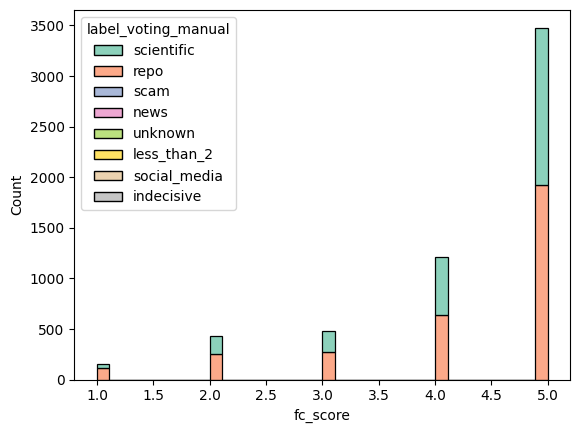

In [28]:
sns.histplot(df_combined, x='fc_score', hue='label_voting_manual', palette='Set2', multiple='stack')

<Axes: xlabel='label_voting_manual', ylabel='Count'>

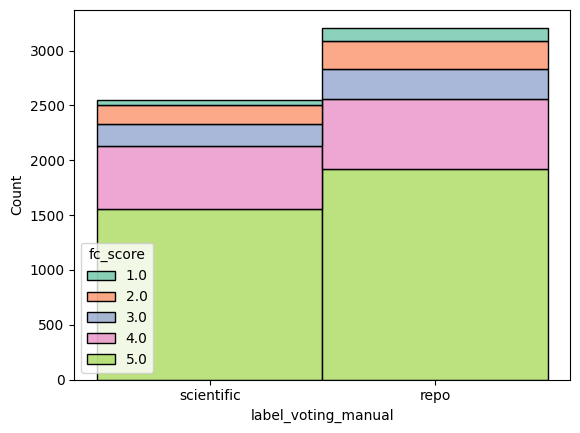

In [29]:
sns.histplot(df_combined, hue='fc_score', x='label_voting_manual', palette='Set2', multiple='stack')


In [34]:
# percentage of posts in repo and scientific that we covered
df_combined[~df_combined['fc_score'].isna()]['label_voting_manual'].value_counts(), df_combined[df_combined['is_top_domain_repo'] | df_combined['is_top_domain_scientific']]['label_voting_manual'].value_counts()

(label_voting_manual
 repo          3210
 scientific    2548
 Name: count, dtype: int64,
 label_voting_manual
 scientific    27132
 repo           6725
 Name: count, dtype: int64)

In [43]:
df_combined[~df_combined['fc_score'].isna() & (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()

domain
doi.org                    574
tandfonline.com            551
pubs.acs.org               542
nejm.org                   500
arxiv.org                  374
ncbi.nlm.nih.gov           336
pubmed.ncbi.nlm.nih.gov    308
frontiersin.org             23
bmj.com                      2
Name: count, dtype: int64

In [47]:
df_combined[ (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()

domain
ncbi.nlm.nih.gov                 1401
doi.org                          1102
frontiersin.org                   701
pubs.acs.org                      601
tandfonline.com                   583
                                 ... 
10.7554                             1
figshare.com                        1
m.phg.sagepub.com                   1
docs.autismresearchcentre.com       1
sci-hub.cc                          1
Name: count, Length: 531, dtype: int64

In [49]:
pd.merge(df_combined[ (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()
, df_combined[~df_combined['fc_score'].isna() & (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()
, on='domain', how='outer')

,count_x,count_y
domain,,
0e33611cb8e6da737d5c-e13b5a910e105e07f9070866adaae10b.r15.cf1.rackcdn.com,2,NaN
10.7554,1,NaN
aac.asm.org,13,NaN
aacrjournals.org,11,NaN
aappublications.org,16,NaN
...,...,...
wires.onlinelibrary.wiley.com,2,NaN
zenodo.org,24,NaN
zookeys.pensoft.net,21,NaN


## Let's actually run some analysis on this

<Axes: xlabel='year', ylabel='fc_score'>

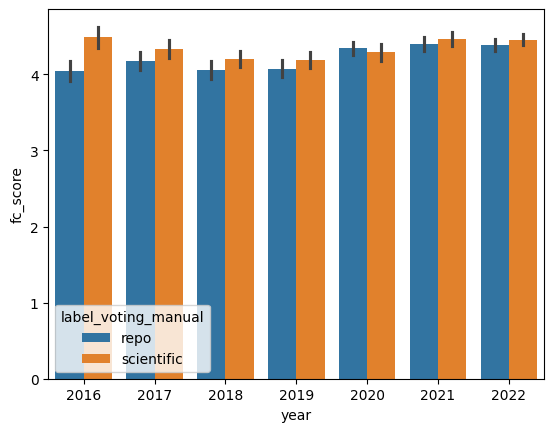

In [53]:
sns.barplot(df_combined[~df_combined['fc_score'].isna()], x='year', y='fc_score', hue='label_voting_manual')

<Axes: xlabel='month', ylabel='fc_score'>

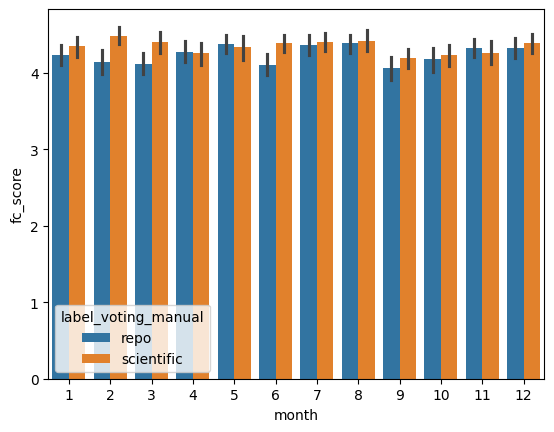

In [57]:
sns.barplot(df_combined[~df_combined['fc_score'].isna()], x='month', y='fc_score', hue='label_voting_manual')

<Axes: xlabel='top_category', ylabel='fc_score'>

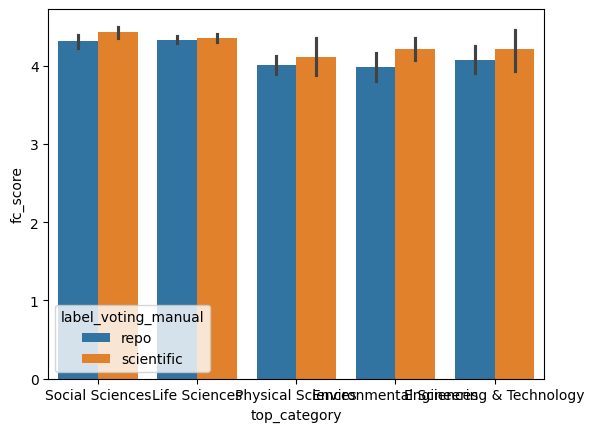

In [63]:
sns.barplot(df_combined[~df_combined['fc_score'].isna()], x='top_category', y='fc_score', hue='label_voting_manual')


<Axes: xlabel='top_category', ylabel='fc_score'>

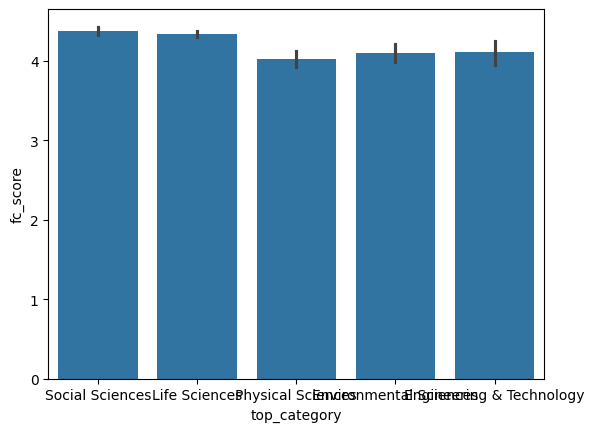

In [64]:
sns.barplot(df_combined[~df_combined['fc_score'].isna()], x='top_category', y='fc_score')



<Axes: xlabel='fc_score', ylabel='score'>

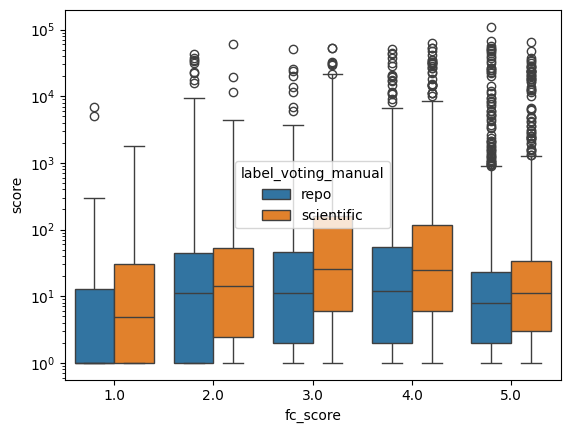

In [56]:

sns.boxplot(df_combined[~df_combined['fc_score'].isna()], x='fc_score', y='score', hue='label_voting_manual', log_scale=True)